<a href="https://colab.research.google.com/github/tylaar1/PICAR-autopilot/blob/main/PICAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import os
import seaborn as sns
import random
import pandas as pd

In [14]:
import os
training_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/training_data/training_data' #train file path
training_image_files = [os.path.join(training_image_folder, f) for f in os.listdir(training_image_folder)]
test_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/test_data'#test file path
test_image_files = [os.path.join(test_image_folder, f) for f in os.listdir(test_image_folder)]
test_image_files

['/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/test_data/test_data']

In [17]:
print(os.listdir(training_image_folder))

['10401.png', '10423.png', '10382.png', '10409.png', '10405.png', '10404.png', '10408.png', '10407.png', '1041.png', '10402.png', '10400.png', '10375.png', '10376.png', '10377.png', '10374.png', '10379.png', '10373.png', '10420.png', '10394.png', '10393.png', '10399.png', '10395.png', '10398.png', '10391.png', '10388.png', '10389.png', '1039.png', '10410.png', '10397.png', '10396.png', '10419.png', '1042.png', '10418.png', '1040.png', '10403.png', '10406.png', '10390.png', '10421.png', '104.png', '10392.png', '10378.png', '1038.png', '10384.png', '10381.png', '10383.png', '10386.png', '10387.png', '10385.png', '10380.png', '10415.png', '10416.png', '10417.png', '10413.png', '10412.png', '10414.png', '10411.png', '10466.png', '10469.png', '10467.png', '10465.png', '1047.png', '10468.png', '10472.png', '10492.png', '10491.png', '10494.png', '10471.png', '10456.png', '10457.png', '10454.png', '10455.png', '10493.png', '10490.png', '1049.png', '10489.png', '10488.png', '10486.png', '10473.

In [38]:
training_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/training_data'
test_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/test_data'
labels_file = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/training_norm.csv'

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_image_folder,
    image_size=(224, 224),
    batch_size=32,
    shuffle = False

)

# Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_folder,
    image_size=(224, 224),
    batch_size=32,
    shuffle = False

)
#load image labels
labels = pd.read_csv(labels_file)
labels.head()


Found 13798 files belonging to 1 classes.
Found 1020 files belonging to 1 classes.


,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


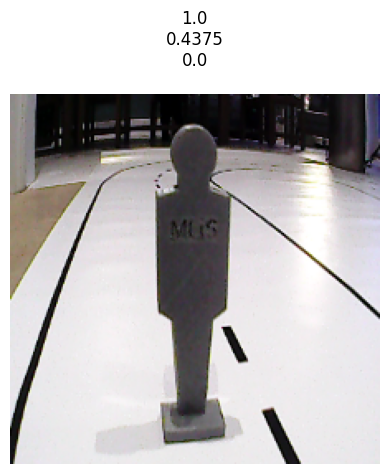

In [44]:
for images in train_dataset.take(1):

    first_batch = images[0]
    first_image = first_batch[0]

first_label = labels.iloc[0]
first_label_csv = first_label.to_csv(header=False, index=False)

plt.imshow(first_image.numpy().astype("uint8"))
plt.title(first_label_csv)
plt.axis("off")  # Hide axes
plt.show()